# 회귀가정 데이터 생성 및 시각화 함수 정리

In [12]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (나눔고딕 사용)
plt.rc('font', family='AppleGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 더미 데이터 생성 (가정 만족)
def generate_data():
    np.random.seed(42)
    x = np.linspace(1, 100, 100)
    y = 5 * x + np.random.normal(0, 50, 100)  # 선형성 만족
    return x, y

# 선형성 위배 데이터
def generate_nonlinear_data():
    np.random.seed(42)
    x = np.linspace(1, 100, 100)
    y = 5 * np.sin(0.1 * x) * x + np.random.normal(0, 50, 100)
    return x, y

# 독립성 위배 데이터
def generate_dependent_data():
    np.random.seed(42)
    x = np.linspace(1, 100, 100)
    y = 5 * x + np.random.normal(0, 50, 100)
    y[1:] += 0.8 * y[:-1]  # 자기상관 추가
    return x, y

# 등분산성 위배 데이터
def generate_heteroscedastic_data():
    np.random.seed(42)
    x = np.linspace(1, 100, 100)
    y = 5 * x + (x * np.random.normal(0, 20, 100))  # 분산이 증가함
    return x, y

# 정규성 위배 데이터
def generate_non_normal_data():
    np.random.seed(42)
    x = np.linspace(1, 100, 100)
    y = 5 * x + np.random.exponential(50, 100)  # 지수 분포의 노이즈 추가
    return x, y

# 선형성 시각화
def plot_linearity(x, y):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})
    plt.xlabel("독립 변수 (X)")
    plt.ylabel("종속 변수 (Y)")
    plt.title("선형성 검토")
    plt.show()

# 독립성 시각화 (잔차의 자기상관 확인)
def plot_independence(x, y):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    residuals = model.resid
    plt.figure(figsize=(8, 6))
    plt.plot(residuals, marker='o', linestyle='dashed')
    plt.xlabel("샘플 인덱스")
    plt.ylabel("잔차")
    plt.title("독립성 검토 (잔차의 분포)")
    plt.show()

# 등분산성 시각화 (잔차 vs 예측값)
def plot_homoscedasticity(x, y):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    fitted_vals = model.fittedvalues
    residuals = model.resid
    plt.figure(figsize=(8, 6))
    plt.scatter(fitted_vals, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("예측값")
    plt.ylabel("잔차")
    plt.title("등분산성 검토")
    plt.show()

# 정규성 시각화 (Q-Q Plot)
def plot_normality(x, y):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    residuals = model.resid
    plt.figure(figsize=(8, 6))
    sm.qqplot(residuals, line='s', fit=True)
    plt.title("정규성 검토 (Q-Q Plot)")
    plt.show()

# 회귀 가정 데이터 및 시각화

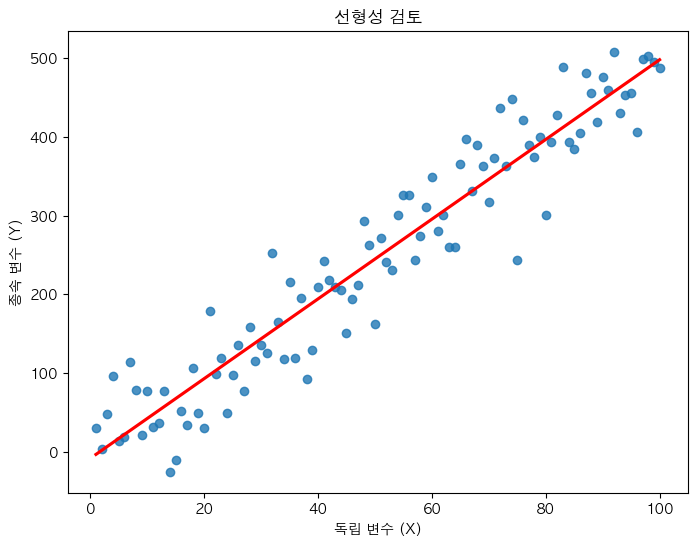

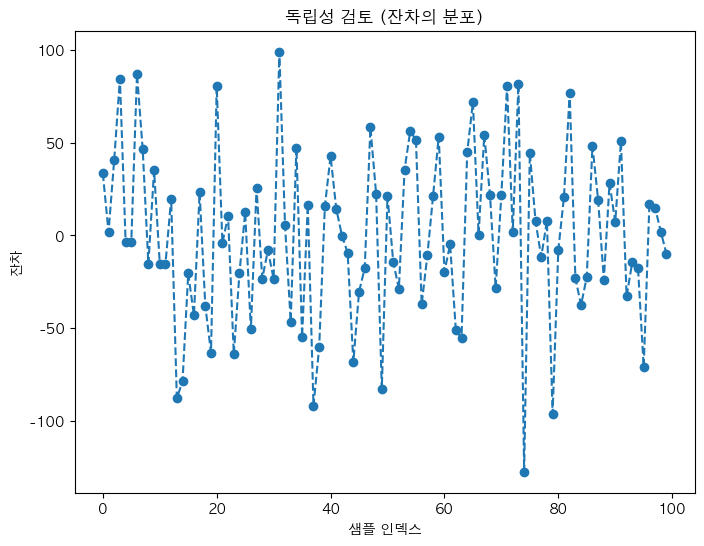

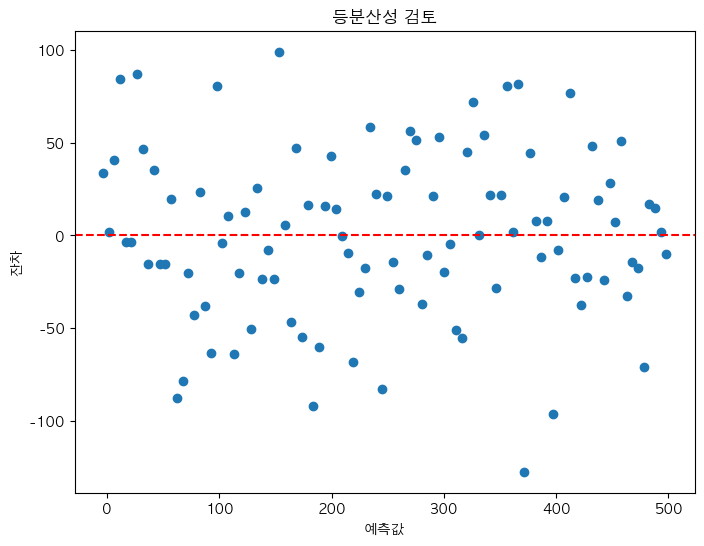

<Figure size 800x600 with 0 Axes>

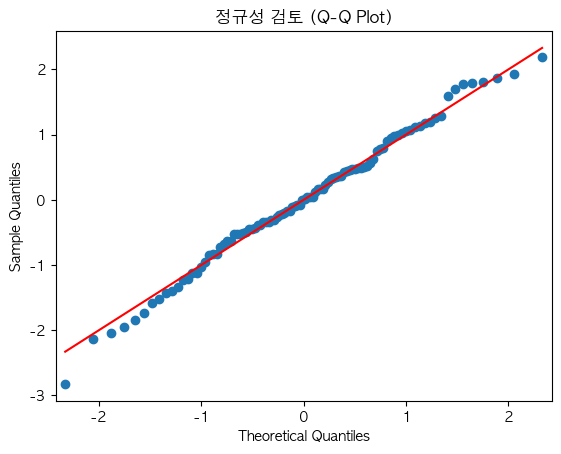

In [10]:
x, y = generate_data()
plot_linearity(x, y)
plot_independence(x, y)
plot_homoscedasticity(x, y)
plot_normality(x, y)

# 가정 위배 데이터 및 시각화

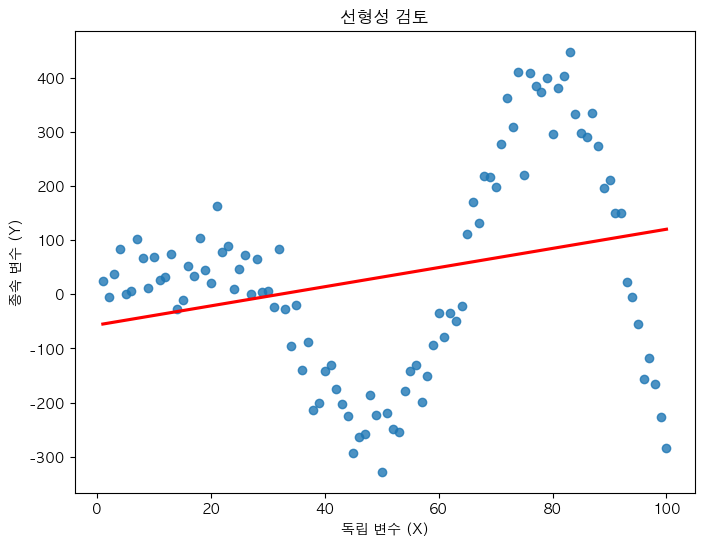

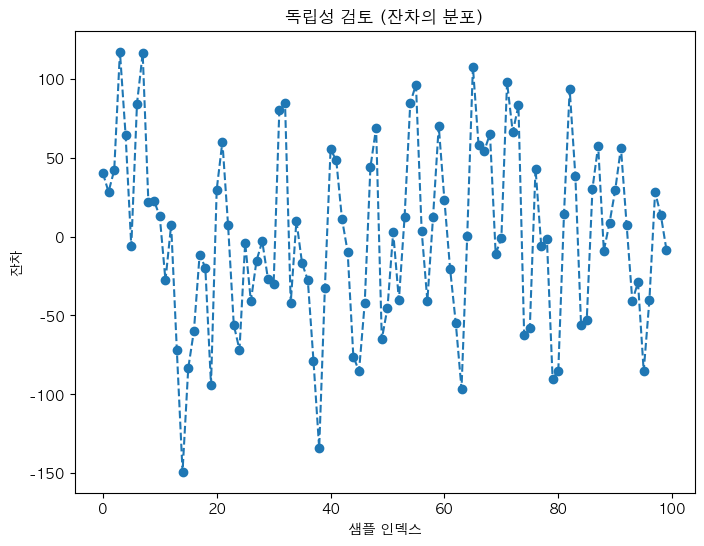

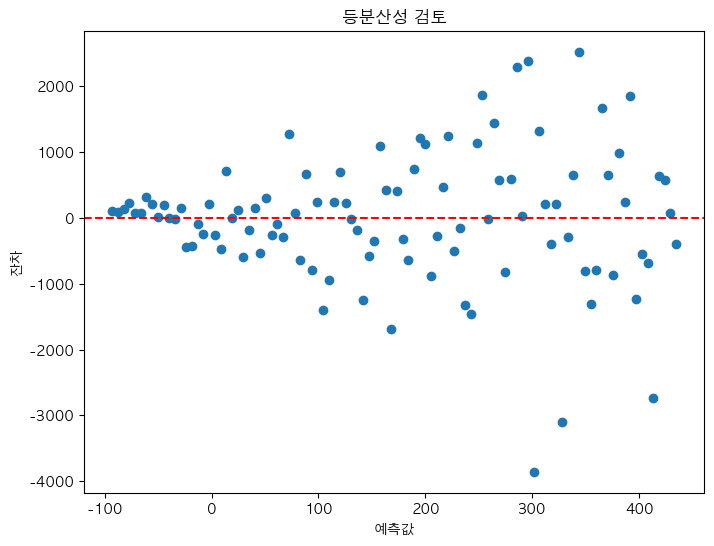

<Figure size 800x600 with 0 Axes>

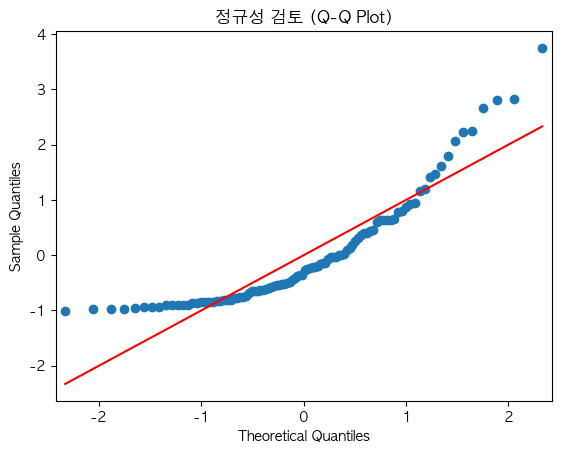

In [11]:
x_nl, y_nl = generate_nonlinear_data()
plot_linearity(x_nl, y_nl)  # 선형성 위배

x_dep, y_dep = generate_dependent_data()
plot_independence(x_dep, y_dep)  # 독립성 위배

x_het, y_het = generate_heteroscedastic_data()
plot_homoscedasticity(x_het, y_het)  # 등분산성 위배

x_nn, y_nn = generate_non_normal_data()
plot_normality(x_nn, y_nn)  # 정규성 위배